![](https://i.pinimg.com/564x/d9/bc/aa/d9bcaa0a691f4bc21b493f6fa8dceab1.jpg)

# Numpy Camera

Kevin J. Walchko, Phd

XX

[![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-sa/4.0/)

---


![](pinhole_model.png)



In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np # matrix manipulations
from numpy.testing import assert_allclose
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
from numpy import sin, cos, pi

%matplotlib inline
from matplotlib import pyplot as plt

import cv2  # drawing

In [3]:
from numpy_camera import PinholeCamera
from rotations.rotations import R313

In [4]:
pc = PinholeCamera()
pc.set_piv2(640,480,R=R313(0,90,90,degrees=True)) # wtf!!!
print(pc.K)
print(pc.Rt)

[[505.7   0.  320. ]
 [  0.  606.8 240. ]
 [  0.    0.    1. ]]
[[ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 1.  0.  0.  0.]]


In [15]:
r=10
pts = []
for i in range(-40,40):
    x = r*cos(pi*i/180)
    y = r*sin(pi*i/180)
    z = 2
    pts.append([x,y,z])
    
pts = np.array(pts).T
    
print(pts.shape)
# print(pts)

print("================================")

print(pc.K)

print("================================")

n = pts.shape[1]
pts = np.vstack((pts, np.ones(n)))
a = pc.K @ pc.Rt @ pts
a /= a[2, :]
print(a.shape)
# print("camera space\n",a[:2,:].T)

(3, 80)
[[505.7   0.  320. ]
 [  0.  606.8 240. ]
 [  0.    0.    1. ]]
(3, 80)


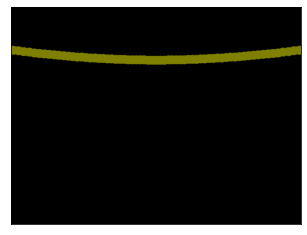

In [16]:
pts_2d = a

img_width = pc.shape.w
img_height = pc.shape.h

# Filter points to be within image FOV
inds = np.where((pts_2d[0, :] < img_width) & (pts_2d[0, :] >= 0) &
                (pts_2d[1, :] < img_height) & (pts_2d[1, :] >= 0) 
                )[0]

# # Filter out pixels points
imgfov_pc_pixel = pts_2d[:, inds]

# make depth
l = imgfov_pc_pixel.shape[1]
imgfov_pc_cam2 = np.array([10]*l)

# # Retrieve depth from lidar
# imgfov_pc_velo = pts_velo[inds, :]
# imgfov_pc_velo = np.hstack((imgfov_pc_velo, np.ones((imgfov_pc_velo.shape[0], 1))))
# imgfov_pc_cam2 = proj_velo2cam2 @ imgfov_pc_velo.transpose()

cmap = plt.cm.get_cmap('hsv', 256)
cmap = np.array([cmap(i) for i in range(256)])[:, :3] * 255

img = np.zeros((img_height,img_width,3),dtype=np.int8)

for i in range(imgfov_pc_pixel.shape[1]):
    depth = imgfov_pc_cam2[i]
    color = cmap[int(640.0 / depth), :]
    cv2.circle(
        img,
       (int(np.round(imgfov_pc_pixel[0, i])),
        int(np.round(imgfov_pc_pixel[1, i]))),
       10, color=tuple(color), thickness=-1)
plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

In [18]:
dd={"f":(32.44),"cx":22}
if "f" in dd:
    print(dd["f"])
    dd.pop("f")
    
print(dd)

32.44
{'cx': 22}
